In [10]:
import matplotlib.pyplot as plt
import numpy as np

from linear_geodesic_optimization.mesh.rectangle import Mesh as RectangleMesh
from linear_geodesic_optimization.optimization.laplacian import Computer as Laplacian
from linear_geodesic_optimization.optimization.geodesic import Computer as Geodesic
from linear_geodesic_optimization.optimization.geodesic_exact import Computer as GeodesicExact
from linear_geodesic_optimization.plot import get_mesh_plot, get_heat_map

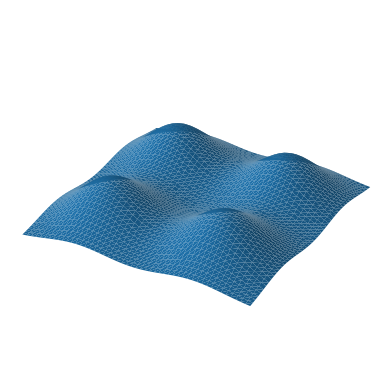

In [11]:
width = height = 50
scale = 1.
mesh = RectangleMesh(width, height, scale)

x, y, _ = mesh.get_coordinates().T
z = (20**2 - x**2 - y**2)**0.5
z = sum(
    scale * np.exp(-((x - mu[0])**2 + (y - mu[1])**2) * 25 / scale**2) / 5
    for mu in [
        (-scale / 4, -scale / 4),
        (-scale / 4, scale / 4),
        (scale / 4, -scale / 4),
        (scale / 4, scale / 4),
    ]
)
z = mesh.set_parameters(z)

get_mesh_plot(mesh)
# plt.savefig('mesh.png', dpi=300)
plt.show()

In [12]:
source = mesh.nearest_vertex(np.array([-scale / 3., scale / 4.])).index()
m = 1.

laplacian = Laplacian(mesh)
geodesic = Geodesic(
    mesh,
    source,
    [],
    laplacian,
    m,
)

geodesic.forward()
distances = (geodesic._phi - geodesic._phi[source])

In [ ]:
exact_distances = []
for destination in range(mesh.get_topology().n_vertices()):
    geodesic_exact = GeodesicExact(mesh, source, destination)
    geodesic_exact.forward()
    exact_distances.append(geodesic_exact.distance)
    if (destination + 1) % 100 == 0:
        print(destination + 1)
exact_distances = np.array(exact_distances)

In [ ]:
relative_errors = np.divide(np.abs(distances - exact_distances), exact_distances, np.zeros_like(exact_distances), where=exact_distances!=0)
plt.hist(relative_errors)
plt.title(f'Relative Errors with $m = {m}$')
# plt.savefig(f'relative_errors_{m}.png', dpi=300)
plt.show()

In [ ]:
absolute_errors = np.abs(distances - exact_distances)
plt.hist(absolute_errors)
plt.title(f'Absolute Errors with $m = {m}$')
# plt.savefig(f'absolute_errors_{m}.png', dpi=300)
plt.show()

In [ ]:
plt.plot(relative_errors, absolute_errors, 'b.')
plt.title(f'Absolute vs. Relative Errors with $m = {m}$')
plt.xlabel('Relative Error')
plt.ylabel('Absolute Error')
# plt.savefig(f'scatter_{m}.png', dpi=300)
plt.show()

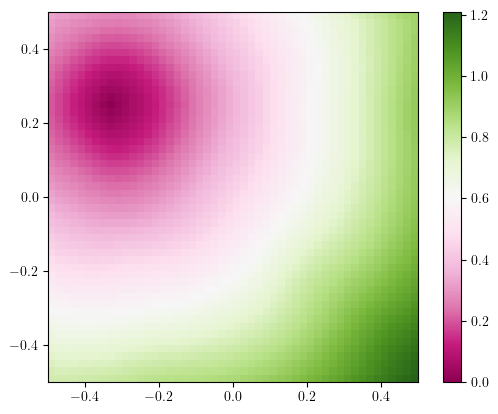

In [13]:
x = list(sorted(set(x)))
y = list(sorted(set(y)))
get_heat_map(x, y, distances.reshape(width, height).T)
# plt.savefig(f'heat_method_{m}.png', dpi=300)
plt.show()

In [ ]:
get_heat_map(x, y, exact_distances.reshape(width, height).T)
# plt.savefig(f'exact.png', dpi=300)
plt.show()